In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import asyncio
import aiohttp
import nest_asyncio
from selenium import webdriver
from loguru import logger
from datetime import datetime
import glob
from matplotlib import pyplot as plt
from collections import Counter

from fake_useragent import UserAgent


nest_asyncio.apply()


## Спарсим рамблер

Это работает так: сначала код запрашивает требуемую страинцу у рамблера, тот в ответ отправляет html страницу, а затем идет поиск тега, в котором находится текст гороскопа. 

In [ ]:
signs=['aries','gemini','taurus','cancer','leo','virgo','libra','scorpio','sagittarius','capricorn','aquarius','pisces']
data = pd.read_csv('data.csv', names=['date', 'sign', 'text'])

for i in range(2004,2021):
    for j in range(1,13):
        for k in range(1,32):
            for sign in signs:
                try:
                    year=i
                    month=j
                    day=k
                    if month<10:
                        month='0'+str(month)
                    if day<10:
                        day='0'+str(day)
                    date='%s-%s-%s'%(year,month,day)
                    url = 'https://horoscopes.rambler.ru/%s/%s/?updated'% (sign,date)  # url для второй страницы
                    print(url)
                    r = requests.get(url)
                    response = r.text.encode('utf-8')

                    soup = BeautifulSoup(response, features="lxml")
                    text = soup.find('div', {'class': '_1dQ3'}).text
                    data=data.append({'date': date, 'sign': sign, 'text': text}, ignore_index=True)
                    data.to_csv('data.csv', encoding = 'utf-8')
                    print('saved date=', date, ' sign=', sign)
                except Exception:
                    continue

## Сайт Ростова-на-Дону

https://www.1rnd.ru/

In [ ]:
news=[]
url='https://www.1rnd.ru/news/3089599'
print(url)
r = requests.get(url)
response = r.text
soup = BeautifulSoup(response, 'html.parser')

news_text=soup.findAll('p', {'style': "text-align:justify;"})
date_text=soup.findAll('div', {'class': "article-info__time"})
header_text=soup.findAll('div',{'class':'title-container inner-title'})

if news_text:
    print('success')
    text_line=''
    for text in news_text:
         text_line=text_line+text.get_text()
    news.append([header_text[0].get_text(),date_text[0].get_text().split(),text_line])

In [ ]:
news = pd.DataFrame({'header': [0], 'date': [0], 'news': [0]})

In [ ]:
start1=7135
start2=300000
start3=600000
start4=900000
start5=1200000
start6=1500000
start7=1800000
start8=2100000
start9=2400000
start10=2700000

end1=299999
end2=599999
end3=899999
end4=1199999
end5=1499999
end6=1799999
end7=2099999
end8=2399999
end9=2699999
end10=2999999


async def get_news(start,end):
    global news
    for i in range(start,end):
        url ='https://www.1rnd.ru/news/{0}'.format(str(i)) 
        print(url)
        
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:

                response = await response.text()
                soup = BeautifulSoup(response, 'html.parser')

                news_text=soup.findAll('p', {'style': "text-align:justify;"})
                date_text=soup.findAll('div', {'class': "article-info__time"})
                header_text=soup.findAll('div',{'class':'title-container inner-title'})

                if news_text:
                    print('success')
                    text_line=''
                    for text in news_text:
                         text_line=text_line+text.get_text()
                            
                    date=date_text[0].get_text()
                    header=header_text[0].get_text()

                    news=news.append({'header': header, 'date': date, 'news': text_line}, ignore_index=True)
                    news.to_csv('news.csv', encoding = 'utf-8')

futures = [get_news(start1,end1),
           get_news(start2,end2),
           get_news(start3,end3),
           get_news(start4,end4),
           get_news(start5,end5),
           get_news(start6,end6),
           get_news(start7,end7),
           get_news(start8,end8),
           get_news(start9,end9),
           get_news(start10,end10)]

loop = asyncio.get_event_loop()
loop.run_until_complete(asyncio.wait(futures))
loop.close()

Товарная единица - ивент

Нужно определить - 
 - [x] категория
 - [x] стоимость 
 - [x] геопозиция
 - [x] дата
 - [x] длительность
 - [x] количество людей
 - [ ] список услуг (недоступно)
 - [x] кто проводит
 - [x] сайт

# BookYogaRetreats

In [ ]:
page=1
base_url='www.bookyogaretreats.com'
url = f'https://{base_url}/?page={page}'
print(url)
r = requests.get(url)
response = r.text.encode('utf-8')

soup = BeautifulSoup(response)
text = soup.findAll('a', {'class': 'js-showcard-link'},href=True)
card_urls=[]
for t in text:
    card_urls.append(t['href'])
# data=data.append({'date': date, 'sign': sign, 'text': text}, ignore_index=True)
# data.to_csv('data.csv', encoding = 'utf-8')
# print('saved date=', date, ' sign=', sign)

In [ ]:
card_urls

In [ ]:
page=1
base_url='www.bookyogaretreats.com'
url = f'https://{base_url}{card_urls[10]}'
# url='https://www.bookyogaretreats.com/yoga-weeks/6-day-urban-yoga-retreat-in-barcelona-catalonia'
print(url)
r = requests.get(url)
response = r.text.encode('utf-8')

soup = BeautifulSoup(response,'html.parser')
text = soup.findAll('a', {'class': 'js-showcard-link'})

In [ ]:
# soup

In [ ]:
soup.findAll('div', {'id': 'error-page'})[0].text

In [ ]:
soup.findAll('div', {'id': 'error-page'})

# Completed


In [ ]:
duration=soup.findAll('div', {'class': 'subtitle-small listing-query-box__duration js-sc3-inquiry-modal-duration js-insert-duration'})[0].text
duration=duration.replace('\n','').split(' ')[0]
duration

In [ ]:
title=soup.findAll('h1', {'class': 'listing-title__title title listing-title-new'})[0].text
title

In [ ]:
arrival=soup.findAll('span', {'class': 'js-sc1-inquiry-modal-arrival'})
if len(arrival)!=0:
    arrival=arrival[0].text
    arrival=arrival.replace(',','').split(' ')
    arrival[1]=arrival[1][:3]
    arrival=' '.join(arrival[1:])
    arrival=datetime.strptime(arrival, '%b %d %Y').date()
else:
    arrival=None
    

print(arrival)

In [ ]:
departure=soup.findAll('span', {'class': 'js-sc1-inquiry-modal-departure'})
if len(departure)!=0:
    departure=departure[0].text
    departure=departure.replace(',','').split(' ')
    departure[1]=departure[1][:3]
    departure=' '.join(departure[1:])
    departure=datetime.strptime(departure, '%b %d %Y').date()
else:
    departure=None


print(departure)

In [ ]:
datetime.strptime(' 17 2022', '%b %d %Y').date()

In [ ]:
organizer=soup.findAll('div', {'class': 'listing-organizer-card__content'})[0].text[20:].split('\n')[0]
organizer

In [ ]:
arr=soup.findAll('div', {'class': 'listing-overview__notes'})[0].text.split('\n')
arr=[ a for a in arr if a!='']
duration=arr[0].split(' ')[0]
duration

In [ ]:
location=soup.findAll('div', {'class': 'listing-title__location listing-location-new'})
if len(location[0])!=0:
    location=location[0].text
else:
    location=None

print(location)

In [ ]:
arr=soup.findAll('div', {'class': 'listing-overview__notes'})[0].text.split('\n')
arr=[ a for a in arr if a!='']
group_size=[a for a in arr if 'Group' in a]

if len(group_size)!=0:
    if len(group_size[0].split(' '))==6:
         group_size=group_size[0].split(' ')[4]
    elif len(group_size[0].split(' '))==4:
        group_size=group_size[0].split(' ')[2]
else:
    group_size=None

print(arr)
print(group_size)

In [ ]:
driver = webdriver.Firefox(executable_path= r"D:\загрузки\geckodriver-v0.30.0-win64\geckodriver.exe")

In [ ]:
driver.get(url)
driver.find_elements_by_class_name('price')[0].text.split(' ')[1]

In [ ]:
#main page

main_page_url='https://www.bookyogaretreats.com'
r = requests.get(main_page_url)
response = r.text.encode('utf-8')

soup = BeautifulSoup(response)

categories_raw=soup.findAll('li', {'class': 'fakeCheck'})
categories_raw=[' '.join(category.text.replace('\n','').split(' ')[:-1]) for category in categories_raw][12:-4]
categories=[]

for i,category in enumerate(categories_raw):
        if 'level' in category.lower():
            categories.append(category.split(' ')[1])
        else:
            categories.append(category)

# categories

In [ ]:
soup.findAll('div', {'id': 'error-page'})

# Pipeline

In [ ]:
'https://www.bookyogaretreats.com/sr?c=budget-retreats&page=1'

In [2]:
data = pd.DataFrame({'title': [0],'duration': [0], 'arrival': [0], 'departure': [0], 'organizer': [0], 'location': [0], 'group_size': [0], 'price': [0]})
# data_categories={}

In [5]:
main_page_url='https://www.bookyogaretreats.com'

ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}


r = requests.get(main_page_url,headers=headers)
response = r.text.encode('utf-8')
soup = BeautifulSoup(response)

categories_raw=soup.findAll('li', {'class': 'fakeCheck'})
categories_raw=[' '.join(category.text.replace('\n','').split(' ')[:-1]) for category in categories_raw][12:-4]
categories=[]

driver = webdriver.Firefox(executable_path= r"D:\загрузки\geckodriver-v0.30.0-win64\geckodriver.exe")

for i,category in enumerate(categories_raw):
        if 'level' in category.lower():
            categories.append(category.split(' ')[1])
        else:
            categories.append(category)


# c_u=category_page_url=main_page_url+f'/sr?c={cat}&page={page}'
            
for page in range(428,429):
#     cat='-'.join(category.split(' ')).lower()
    cat='cat '
#     stop=False

#     data_categories[cat]=[]
#     while stop is False:
        
    page_url=main_page_url+f'/?page={page}'
    print('NEW Page ',page_url,'\n----------------------')

    # страница каталога 
    r = requests.get(page_url,headers=headers)
    response = r.text.encode('utf-8')
    soup = BeautifulSoup(response)

    # если такой страницы нет, т.е. каталог закончился
    error=soup.findAll('div', {'id': 'error-page'})

    if len(error)>0:
        stop=True
        print(f'####Category page {page} ERROR####')
        break

    text = soup.findAll('a', {'class': 'js-showcard-link'},href=True)
    card_urls=[]
    for t in text:
        card_urls.append(t['href'])

    for card_url in card_urls:

        url = f'{main_page_url}{card_url}'
        print(f'category {cat}, url {url}')
        r = requests.get(url,headers=headers)
        response = r.text.encode('utf-8')
        soup = BeautifulSoup(response,'html.parser')

        error=soup.findAll('div', {'id': 'error-page'})
        if len(error)>0:
            continue


        arr=soup.findAll('div', {'class': 'listing-overview__notes'})[0].text.split('\n')
        arr=[ a for a in arr if a!='']
        duration=arr[0].split(' ')[0]

        title=soup.findAll('h1', {'class': 'listing-title__title title listing-title-new'})[0].text
#             data_categories[cat].append(title)

        arrival=soup.findAll('span', {'class': 'js-sc1-inquiry-modal-arrival'})
        if len(arrival)!=0:
            arrival=arrival[0].text
            arrival=arrival.replace(',','').split(' ')
            arrival[1]=arrival[1][:3]
            arrival=' '.join(arrival[1:])
            arrival=datetime.strptime(arrival, '%b %d %Y').date()
        else:
            arrival=None

        departure=soup.findAll('span', {'class': 'js-sc1-inquiry-modal-departure'})
        if len(departure)!=0:
            departure=departure[0].text
            departure=departure.replace(',','').split(' ')
            departure[1]=departure[1][:3]
            departure=' '.join(departure[1:])
            departure=datetime.strptime(departure, '%b %d %Y').date()
        else:
            departure=None

        organizer=soup.findAll('div', {'class': 'listing-organizer-card__content'})[0].text[20:].split('\n')[0]

        location=soup.findAll('div', {'class': 'listing-title__location listing-location-new'})
        if len(location[0])!=0:
            location=location[0].text
        else:
            location=None

        arr=soup.findAll('div', {'class': 'listing-overview__notes'})[0].text.split('\n')
        arr=[ a for a in arr if a!='']
        group_size=[a for a in arr if 'Group' in a]

        if len(group_size)!=0:
            if len(group_size[0].split(' '))==6:
                 group_size=group_size[0].split(' ')[4]
            elif len(group_size[0].split(' '))==4:
                group_size=group_size[0].split(' ')[2]
        else:
            group_size=None

        driver.get(url)
        
        price_list=driver.find_elements_by_class_name('price')
        if len(price_list)>0:
            if len(price_list[0].text.split(' '))<2:
                price=None
            else:
                price=price_list[0].text.split(' ')[1]
        else:
            price=None

        data=data.append({'title': [title],'duration': [duration], 'arrival': [arrival], 'departure':[departure] ,
                          'organizer': [organizer], 'location': [location], 'group_size': [group_size],
                          'price': [price]}, ignore_index=True)
    data.to_csv('data.csv', encoding = 'utf-8')
#         np.save('data_categories.npy',data_categories)

#         page+=1

<ipython-input-5-bd4594b82fd1>:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path= r"D:\загрузки\geckodriver-v0.30.0-win64\geckodriver.exe")


NEW Page  https://www.bookyogaretreats.com/?page=428 
----------------------
category cat , url https://www.bookyogaretreats.com/yoga-kundalini-teacher-training-in-cozumel/35-dias-de-profesorado-de-yoga-kundalini-de-250-horas-en-la-isla-de-cozumel


<ipython-input-5-bd4594b82fd1>:117: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  price_list=driver.find_elements_by_class_name('price')


In [ ]:
cat='-'.join(categories[0].split(' '))
category_page_url=main_page_url+f'/sr?c={cat}'

In [27]:
df_paths=glob.glob('byr/*')
dfs=[pd.read_csv(path) for path in df_paths]
data=pd.concat(dfs)
del data['Unnamed: 0']
data_df=data.drop_duplicates()
data=data_df.values[1:]

In [28]:
data_df.columns

Index(['title', 'duration', 'arrival', 'departure', 'organizer', 'location',
       'group_size', 'price'],
      dtype='object')

In [72]:
data[0]

array(['6 Day Luxury Wellness Yoga Retreat in Santa Barbara, California',
       5, '2022-3-20', '2022-3-25', 'Luxury Executive Wellness',
       'Ritz Carlton Bacara Santa Barbara, 8301 Hollister Ave, Santa Barbara, CA 93117, United States',
       12, 7235], dtype=object)

In [97]:
df_paths=glob.glob('byr/*')
dfs=[pd.read_csv(path) for path in df_paths]
data=pd.concat(dfs)
del data['Unnamed: 0']
data_df=data.drop_duplicates()
data=data_df.values[1:]


for i,line in enumerate(data):

    title,duration,arrival,departure,organizer,location,group_size,price=line
    title=title[2:-2]
    duration=float(duration[2:-2])
    
    if len(arrival)>6:
        arrival=arrival[15:-2].replace(',','').replace(' ','-')
    else:
        arrival=None
        
    if len(departure)>6:
        departure=departure[15:-2].replace(',','').replace(' ','-')
    else:
        departure=None
        
    organizer=organizer[2:-2]
    location=location[2:-2]

    if 'None' in group_size:
        group_size=None
    elif '-' in group_size:
        group_size=group_size[2:-2].split('-')[1]
        group_size=float(group_size)
    else:
        group_size=float(group_size[2:-2])

    if 'None' in price:
        price=None
    else:
        price=price[2:-2].replace(',','')
        price=float(price)

    
    data[i]=[title,duration,arrival,departure,organizer,location,group_size,price]

    

In [98]:
cleaned_data = pd.DataFrame({'title': data[:,0],'duration': data[:,1], 'arrival': data[:,2], 'departure': data[:,3], 'organizer': data[:,4], 'location': data[:,5], 'group_size': data[:,6], 'price': data[:,7]})
cleaned_data.to_csv('cleaned_data.csv', encoding = 'utf-8')

In [119]:
step=1
year='2024'
for line in cleaned_data.values:
    if  line[2] is None:
#         if line[2][:4]==year:
            step+=1
step

3181

In [122]:
cleaned_data['price'].astype(float).describe()

count     4650.000000
mean      1243.275699
std       1190.227273
min         18.000000
25%        524.250000
50%        897.000000
75%       1572.250000
max      27300.000000
Name: price, dtype: float64

In [126]:
total=0
for line in  cleaned_data.values:
    price=line[-1]
    group_size=line[-2]
    if price is not None and group_size is not None:
        total+=price*group_size
total

56248219.0

In [134]:

for  month_comp in range(1,13):
    titles=[]
    for line in cleaned_data.values:
        if  line[2] is not None:
            year,month,day=line[2].split('-')
            title=line[0]
            if str(month_comp)==month:
                titles.append(title)

    month_df=pd.DataFrame({'titles':titles}).drop_duplicates()

    print(len(month_df))

13
64
238
246
212
183
143
101
99
89
56
28


Количество ретритов на сайте (шт) - 4650

Количество ретритов с привязкой к дате (шт): 2022г - 1437, 2023г - 36, 2024г - 2

Количество ретритов без привязки к дате (шт): 3181

Количество уникальных ретритов с привязкой по дате по месяцам (шт): январь - 13, февраль - 64, март - 238, апрель - 246, май - 212, июнь - 183, июль - 143, август - 101, сентябрь - 99, ноябрь - 56, декабрь - 28 



Цена (евро): среднее - 1243, медиана - 900,  дисперсия - 1190, миниум - 18, максимум - 27300 

Длительность (дни): среднее - 10, медиана - 6, дисперсия - 16, минимум - 1, максимум 365

Количество человек (шт): среднее - 13.5, медиана - 12, дисперсия - 12, минимум - 1, максимум 500

Сумма стоимости ретритов х количество участников (млн евро) - 56.25

In [3]:
cleaned_data=pd.read_csv('bookyogaretreat.csv')

In [21]:
contries=[]
for line in cleaned_data.values:
    cnt=line[-3]
    cnt=cnt.split(' ')[-1]
    if cnt!='on' and cnt!='':
        contries.append(cnt)
contries.sort()
contries=contries[114:]
contries

['Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Ajaccio',
 'Albania',
 'Algarve',
 'Algarve',
 'Alps',
 'America',
 'America',
 'America',
 'America',
 'America',
 'Amsterdam',
 'Anguilla',
 'Aruba',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',

In [29]:
values = contries
counts = Counter(values)
contries_x=[]
contries_y=[]
for k, count in counts.most_common():
    contries_x.append(k)
    contries_y.append(count)
#     print(k, count * 'x')


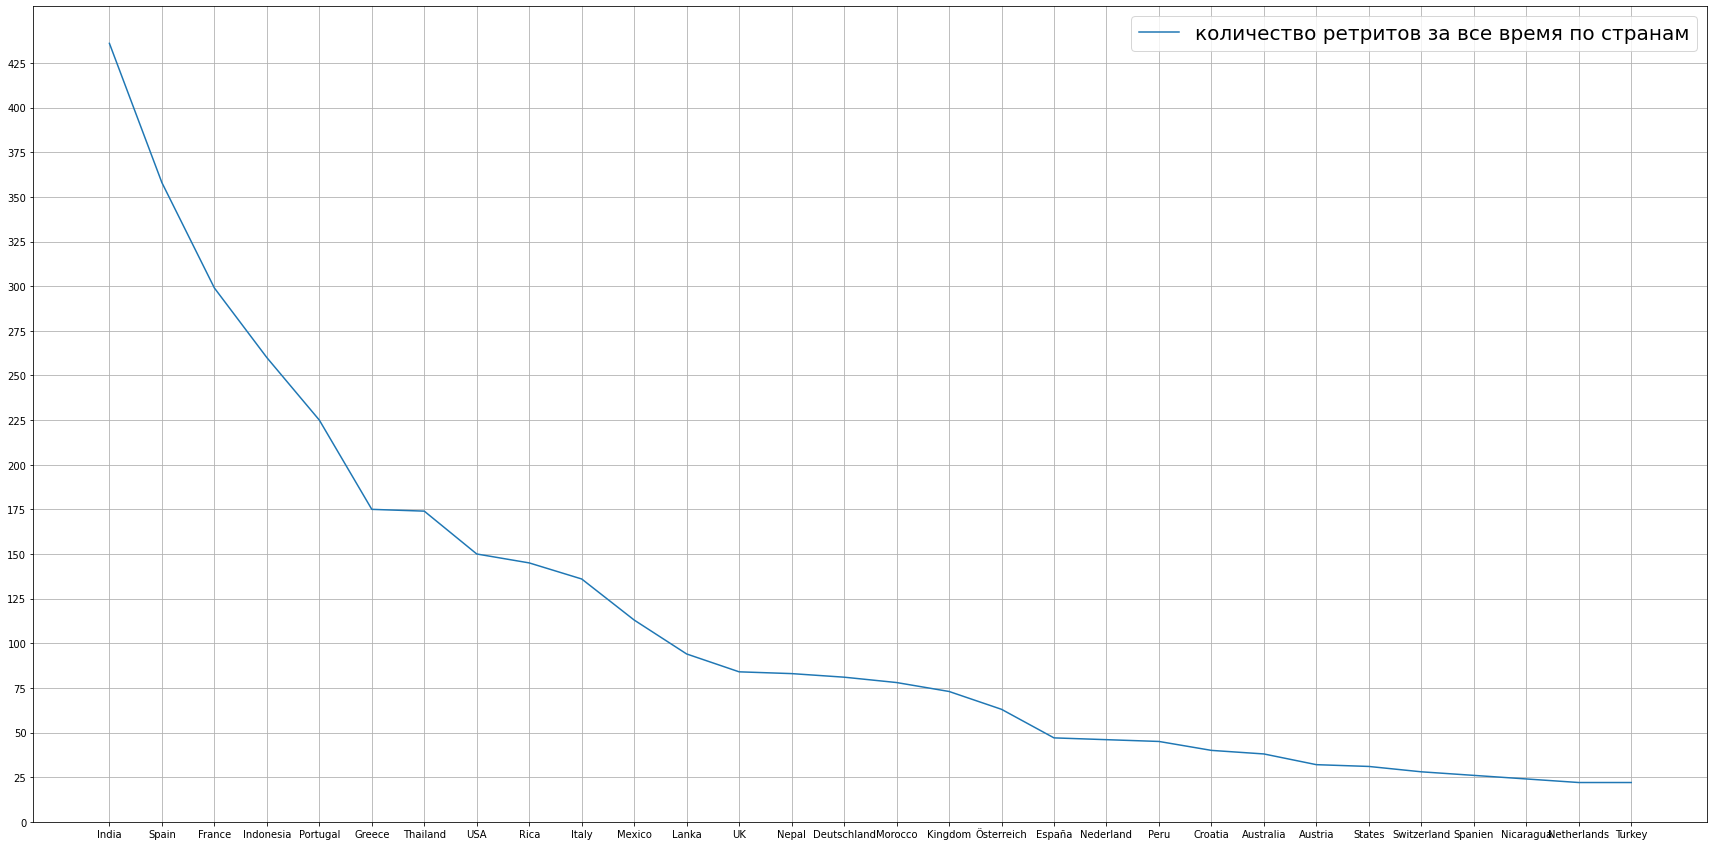

In [47]:
N=30
plt.figure(figsize=(30,15))
plt.plot(contries_x[:N],contries_y[:N])
plt.yticks(np.arange(0,450,25))
plt.grid(True)
plt.legend(['количество ретритов за все время по странам'],fontsize=20)
plt.savefig('ретриты по странам.png')
plt.show()